plots costs with F=1000 frames



In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

FILENAME = "series|2024-11-10|F=1000/data.json"

In [24]:
with open("../data/" + FILENAME) as file:
    json_file = json.load(file)#, parse_float=lambda f: round(float(f), 2))
    data = pd.json_normalize(
        json_file,
        record_path=["snapshots"],
        meta=[
            ["settings", "maxCost"],
            ["settings", "patchImprovement"],
            ["settings", "patchRecovery"],
            ["settings", "recoveryLogic"],
        ],
    )

In [25]:
data["pI"] = data["settings.patchImprovement"]
data["pR"] = data["settings.patchRecovery"]
data["ratio"] = data["pI"] / data["pR"]


In [26]:
data.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement', 'steps',
       'settings.maxCost', 'settings.patchImprovement',
       'settings.patchRecovery', 'settings.recoveryLogic', 'pI', 'pR',
       'ratio'],
      dtype='object')

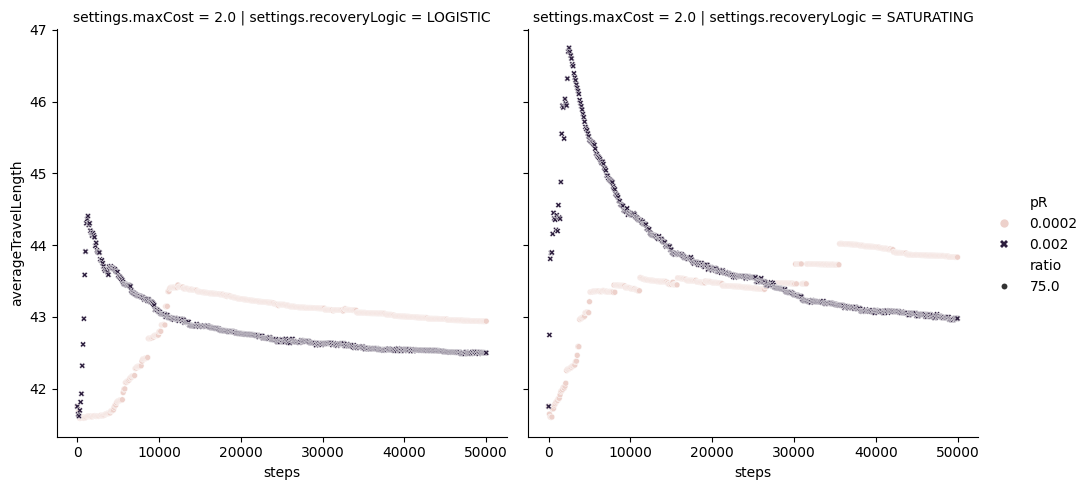

In [33]:
p = sns.relplot(
    data=data[data["steps"] <= 50000],
    x="steps",
    y="averageTravelLength",
    size="ratio",
    style="pR",
    hue="pR",
    col="settings.recoveryLogic",
    row="settings.maxCost",
)

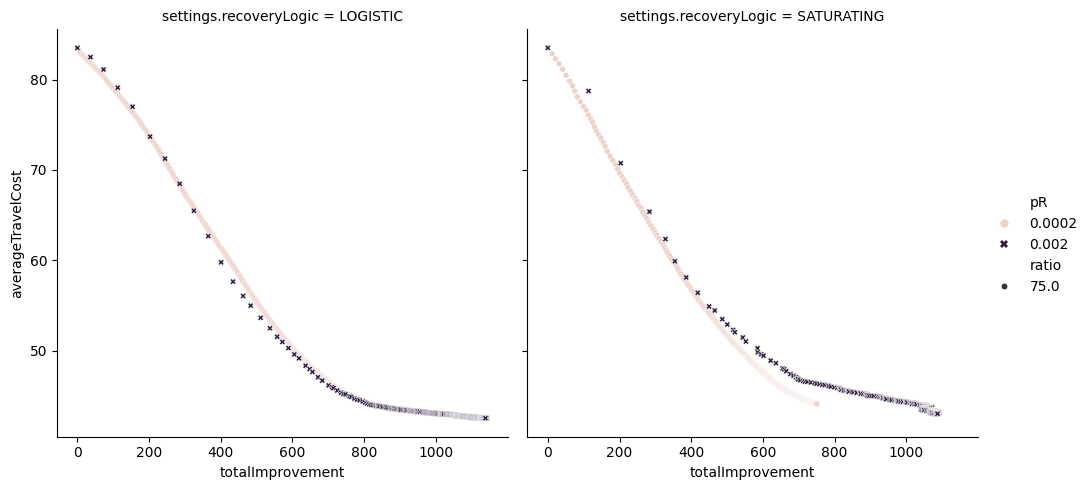

In [34]:
p = sns.relplot(
    data=data[data["steps"] <= 50000],
    x="totalImprovement",
    y="averageTravelCost",
    size="ratio",
    style="pR",
    hue="pR",
    col="settings.recoveryLogic",
)

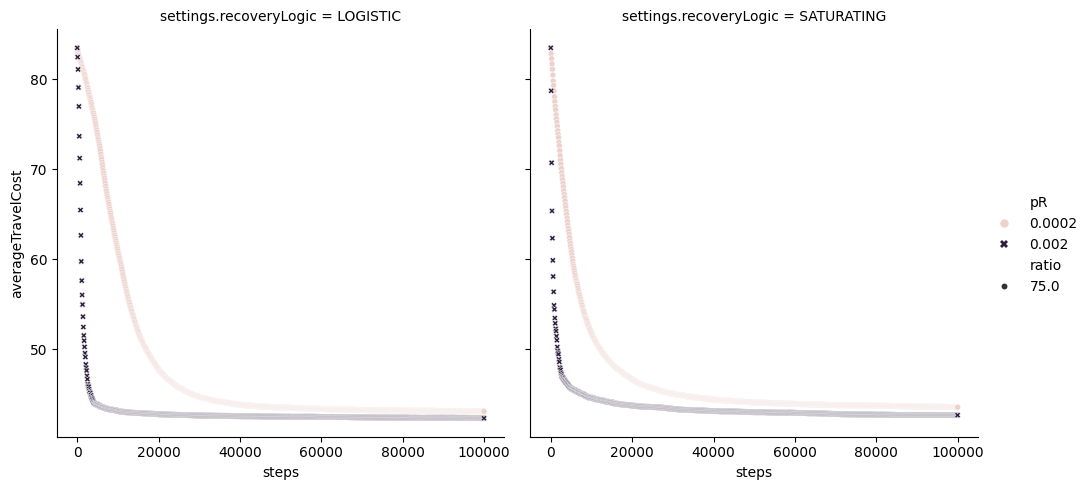

In [29]:
p = sns.relplot(
    data=data[data["settings.maxCost"]==2.0],
    x="steps",
    y="averageTravelCost",
    size="ratio",
    style="pR",
    hue="pR",
    col="settings.recoveryLogic",
)

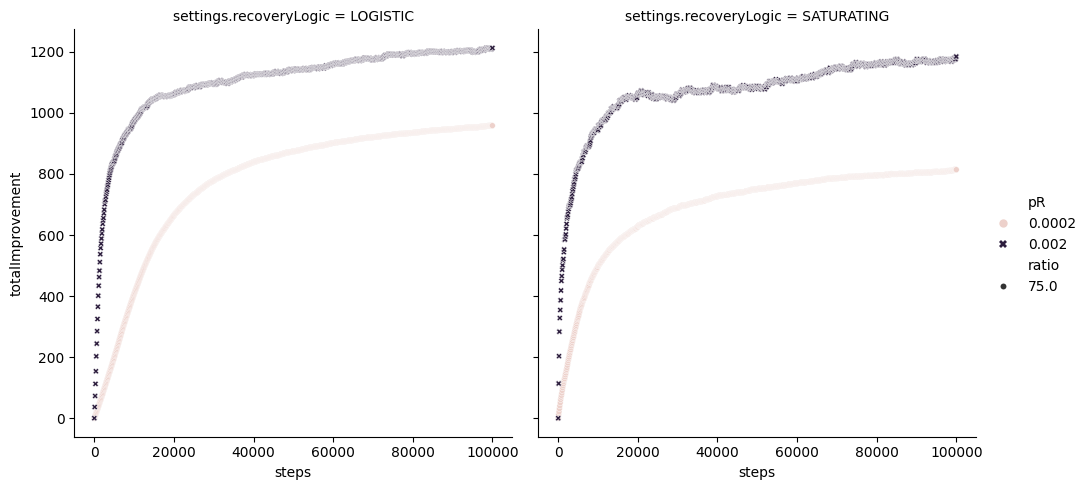

In [30]:
p = sns.relplot(
    data=data[data["settings.maxCost"]==2.0],
    x="steps",
    y="totalImprovement",
    size="ratio",
    style="pR",
    hue="pR",
    col="settings.recoveryLogic",
)